<a href="https://colab.research.google.com/github/bvanitsthian/photocircle_nlp/blob/main/circles_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PhotoCircle/photocircle.csv')

In [ ]:
data.head()

,circle_uuid,user_uuid,media_added_count_x,title,media_count,has_greek_words,real_estate_keywords,is_real_estate,solar_keywords,is_solar,...,is_location,display_name,email_domain,active_count_in_last_30_days,media_added_count_y,first_name,num_female,num_male,female_pct,is_student
0,00005962-836d-d551-c07b-5c2040500002,00000000-575c-c42a-d551-c018b1942652,96,Georgia Jean Williams,160.0,False,[],False,[],False,...,False,Darwin Williams,stthomas.edu,6.0,15.0,Darwin,83.0,24680.0,0.34,True
1,00005bfc-e475-d551-c026-3d658eab0002,4d4f4f68-feff-4490-bd45-ae90ba4acdbf,6,Tri Delta,12235.0,True,[],False,[],False,...,False,tara ghimenti,gmail.com,0.0,0.0,tara,0.0,0.0,50.00,False
2,55a82813-15c0-4faf-897d-d04803036af0,c31e9b29-bf13-4493-a017-54d531d51d7b,31,Vegas 2022,31.0,False,[],False,[],False,...,False,Brenda Yorks,privaterelay.appleid.com,0.0,0.0,Brenda,607096.0,2121.0,99.65,False
3,0000594a-f3f4-d551-c011-88e3b4ad0002,00000000-594a-f5ce-d551-c01188e3c8cb,8,WALK,587.0,False,[],False,[],False,...,False,Rebekah Farnham,gmail.com,0.0,0.0,Rebekah,73511.0,119.0,99.84,False
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,eebe45c6-66fb-4e86-9f39-c55f55d98c95,72,❤ Eric Hazen ❤,466.0,False,[],False,[],False,...,False,Cindy,live.com,0.0,0.0,Cindy,256399.0,770.0,99.70,False


In [ ]:
data.dtypes

circle_uuid                      object
user_uuid                        object
media_added_count_x               int64
title                            object
media_count                     float64
has_greek_words                  object
real_estate_keywords             object
is_real_estate                   object
solar_keywords                   object
is_solar                         object
event_keywords                   object
is_event                         object
occupation_keywords              object
is_occupation                    object
animal_keywords                  object
is_animal                        object
destination_names                object
is_travel                        object
location_names                   object
is_location                      object
display_name                     object
email_domain                     object
active_count_in_last_30_days    float64
media_added_count_y             float64
first_name                       object


#**Preprocess 'title'**

In [ ]:
data_pp = data[['circle_uuid', 'title']].drop_duplicates(subset='circle_uuid')

In [ ]:
data_pp.shape

(2042587, 2)

In [ ]:
data_pp[data_pp['title'].isna()] # 181068 NaN in 'title'

,circle_uuid,title
302,00005c88-7553-d551-c01e-574581620002,NaN
392,00005bb3-b960-d551-c04b-879321640002,NaN
403,00005be8-c07e-d551-c026-3d5044240002,NaN
411,00005597-3aba-9577-9c03-ef46b94b0002,NaN
537,c0b43ce2-cdfd-4362-b387-5544e47ffb1c,NaN
...,...,...
10578514,00005c3f-a7a6-d551-c026-3dc70d510002,NaN
10578516,5d7a3192-f536-4763-b38f-1ff45366276e,NaN
10578566,2951b8be-416e-4edd-8358-7dcac37d517e,NaN
10578668,00005b7d-96e7-d551-c021-fcc61b820002,NaN


In [ ]:
data_pp = data_pp.dropna(subset=['title'])

In [ ]:
data_pp.head(20)

,circle_uuid,title
0,00005962-836d-d551-c07b-5c2040500002,Georgia Jean Williams
1,00005bfc-e475-d551-c026-3d658eab0002,Tri Delta
2,55a82813-15c0-4faf-897d-d04803036af0,Vegas 2022
3,0000594a-f3f4-d551-c011-88e3b4ad0002,WALK
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,❤ Eric Hazen ❤
5,00005da0-a0e3-f8d1-c16b-4a3a07a90002,NYC! Trip 2019
6,7ddeec89-9203-438c-b038-a6293edc4490,First Week Of School 2022-2023
7,0000584d-9b24-d551-c010-c36077dd0002,Christmas In New York
8,14ec9a25-3106-44b2-bbb4-c345154400d5,Lawrence and Family
9,00005d75-4b7e-f8d1-c135-c7ae70c60002,Reniassance 2019


In [ ]:
data_pp['title'] = data_pp['title'].str.lower()

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') #\w+ matches one or more word characters
data_pp['title'] = data_pp['title'].apply(tokenizer.tokenize)

In [ ]:
stop_words = set(stopwords.words('english')) #create english stopwords
data_pp['title'] = data_pp['title'].apply(lambda text: [word for word in text if word.lower() not in stop_words]) #remove the stop words from each list of tokens in the column

In [ ]:
data_pp['title'] = data_pp['title'].apply(lambda words: [word for word in words if word.isalpha()]) 

In [ ]:
data_pp['title'].head(20)

0        [georgia, jean, williams]
1                     [tri, delta]
2                          [vegas]
3                           [walk]
4                    [eric, hazen]
5                      [nyc, trip]
6            [first, week, school]
7           [christmas, new, york]
8               [lawrence, family]
9                    [reniassance]
10                        [connor]
11                [beach, guessed]
12                              []
13               [bahamas, cruise]
14                   [yellowstone]
15    [dickenson, days, christmas]
16                    [michael, b]
17                      [fam, jam]
18       [marriott, owner, cruise]
19              [lesleys, showers]
Name: title, dtype: object

In [ ]:
data_pp = data_pp[data_pp['title'].apply(lambda x: bool(x))]

In [ ]:
data_pp.head(20) #title with empty list gone

,circle_uuid,title
0,00005962-836d-d551-c07b-5c2040500002,"[georgia, jean, williams]"
1,00005bfc-e475-d551-c026-3d658eab0002,"[tri, delta]"
2,55a82813-15c0-4faf-897d-d04803036af0,[vegas]
3,0000594a-f3f4-d551-c011-88e3b4ad0002,[walk]
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,"[eric, hazen]"
5,00005da0-a0e3-f8d1-c16b-4a3a07a90002,"[nyc, trip]"
6,7ddeec89-9203-438c-b038-a6293edc4490,"[first, week, school]"
7,0000584d-9b24-d551-c010-c36077dd0002,"[christmas, new, york]"
8,14ec9a25-3106-44b2-bbb4-c345154400d5,"[lawrence, family]"
9,00005d75-4b7e-f8d1-c135-c7ae70c60002,[reniassance]


In [ ]:
stemmer = SnowballStemmer('english') #reduce words to their root 
data_pp['title'] = data_pp['title'].apply(lambda words: [stemmer.stem(word) for word in words])

In [ ]:
data_pp['title']

0                  [georgia, jean, william]
1                              [tri, delta]
2                                    [vega]
3                                    [walk]
4                             [eric, hazen]
                         ...               
7728706                                [hh]
7728765                 [cité, des, scienc]
7728779    [les, recett, de, tata, marcell]
7728780                 [robert, christian]
7728815                            [famili]
Name: title, Length: 1809979, dtype: object

In [ ]:
#save preprocessed data 
data_pp.to_csv('/content/drive/MyDrive/PhotoCircle/data_pp.csv', index=False)

In [ ]:
data_pp = pd.read_csv('/content/drive/MyDrive/PhotoCircle/data_pp.csv')

#**Word Cloud**

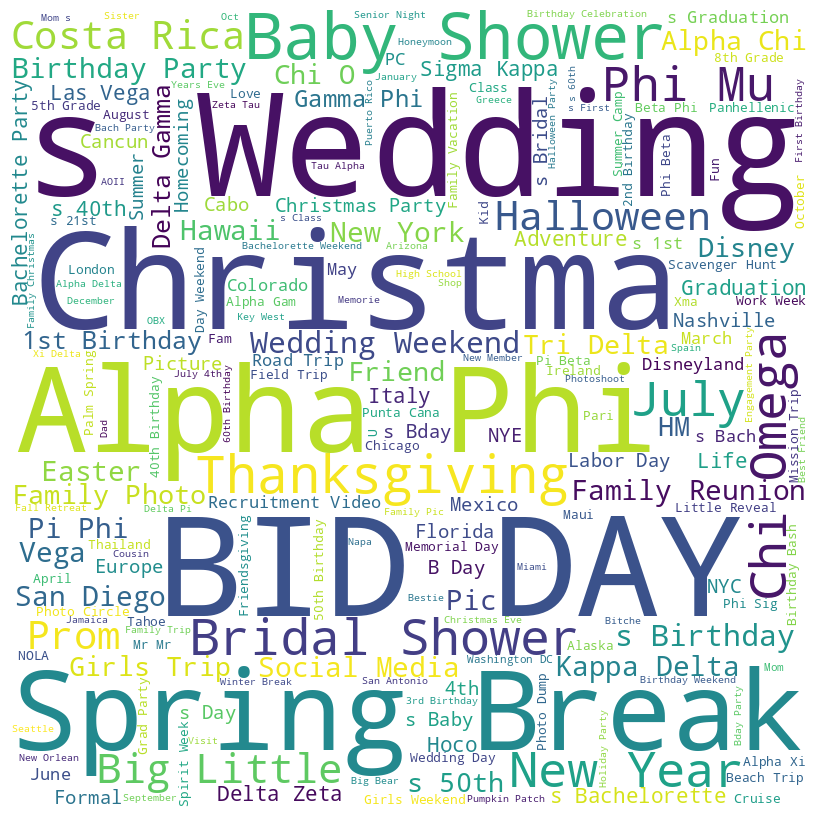

In [ ]:
# Word Cloud before preprocessed data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

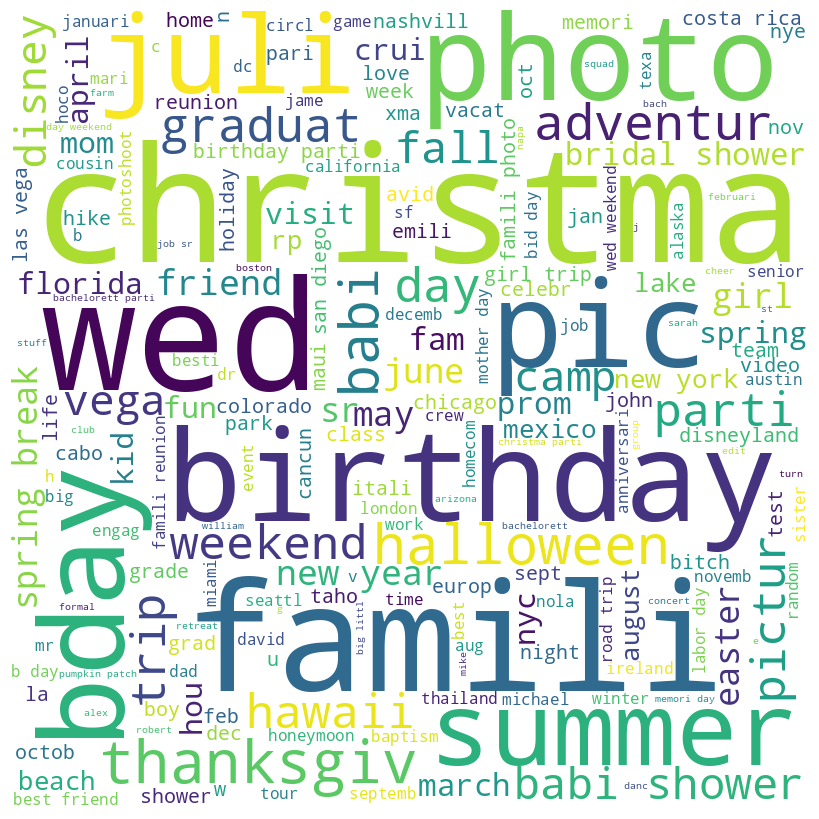

In [ ]:
# Word Cloud AFTER preprocessed data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data_pp['title'].apply(lambda words: ' '.join(words)))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#**Topic Modeling with Random Sampling in chunks of 100,000**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [ ]:
sampled_data = resample(data_pp, n_samples=100000, random_state=42)

In [ ]:
cleaned_title = [' '.join(title) for title in sampled_data['title']]
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(cleaned_title)

In [ ]:
sampled_data.head(20)

,circle_uuid,title
143012,00005ce3-0940-f8d1-c107-3ea111840002,"[day, tour]"
1147668,00005df2-efe8-f8d1-c16f-0952c9aa0002,"[hannah, surgeri]"
155908,badb52d6-639f-4e10-83ac-a1e68df77e63,"[irt, tropic, care]"
4159738,c7a96b1c-6ed9-4f7f-9f51-d10a8280ee26,"[trabajo, depa, lane, park]"
336965,7294fa2c-5957-4e4c-8974-a60061daa56d,"[random, work, shit]"
6422288,7cfa8370-536c-40e9-9e6a-95289860d17a,"[hector, birthday, año]"
127978,db1ccd65-3661-443a-b84c-551b598c2937,"[mcc, mini]"
1303572,7cbac8eb-e760-4fb7-a5b6-f9134c452980,"[alohaladi, goherbalif, com]"
2540063,906c7732-7a4f-4253-a8a6-a33c4c3a4e06,[jojo]
163042,08e2f2ff-03de-4eb3-9231-ca9426fd4a84,"[western, run]"


In [ ]:
num_topics = 10  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(document_term_matrix)

LatentDirichletAllocation(random_state=42)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[:-6:-1]  # Get the indices of the top 5 keywords
    top_words = [feature_names[index] for index in top_word_indices]
    topic_keywords.append(', '.join(top_words))

topic_keywords

['bday, weekend, spring, sr, break',
 'juli, day, bach, mexico, st',
 'photo, pic, pictur, mom, memori',
 'wed, famili, lake, graduat, camp',
 'christma, babi, shower, parti, hawaii',
 'beach, may, love, park, boy',
 'birthday, hous, june, fun, florida',
 'thanksgiv, halloween, fam, game, grad',
 'trip, new, girl, vega, year',
 'summer, disney, friend, adventur, big']

In [ ]:
topic_distribution = lda_model.transform(document_term_matrix)
topic_labels = ['Topic ' + str(i) for i in range(num_topics)]
topic_counts = pd.DataFrame(topic_distribution, columns=topic_labels)
topic_counts['Dominant Topic'] = topic_distribution.argmax(axis=1)
topic_counts['Dominant Topic'] = topic_counts['Dominant Topic'].apply(lambda x: topic_labels[x])

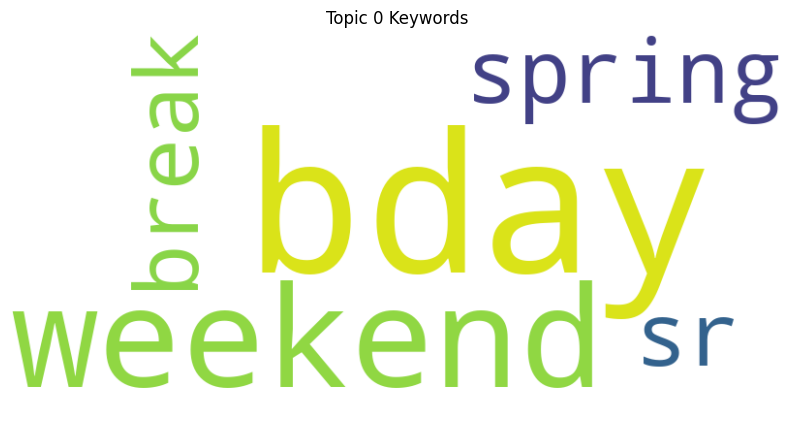

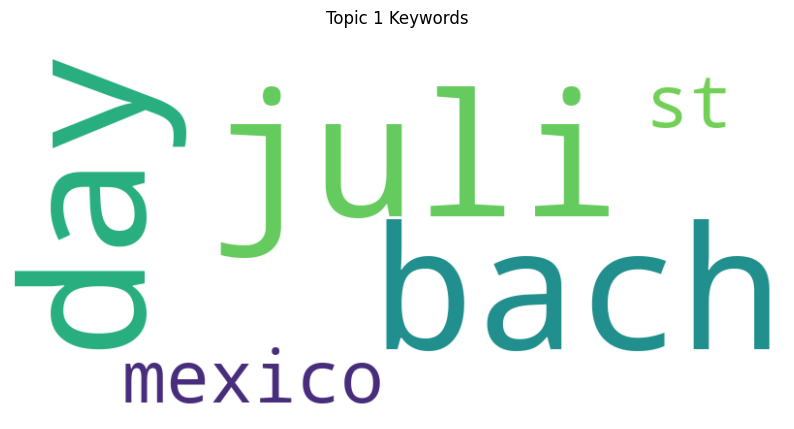

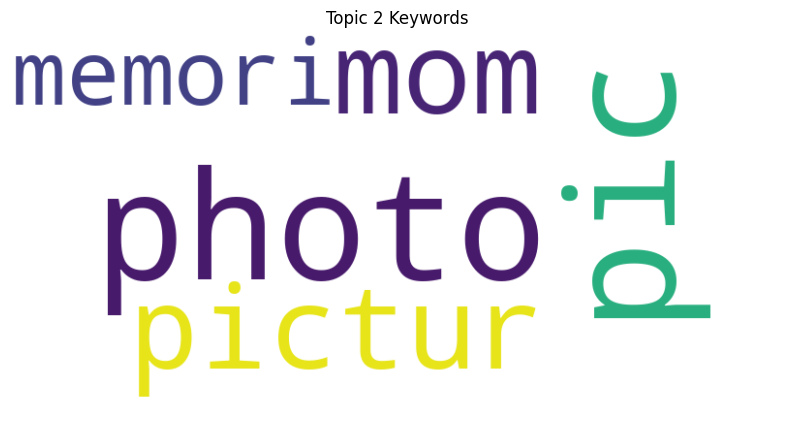

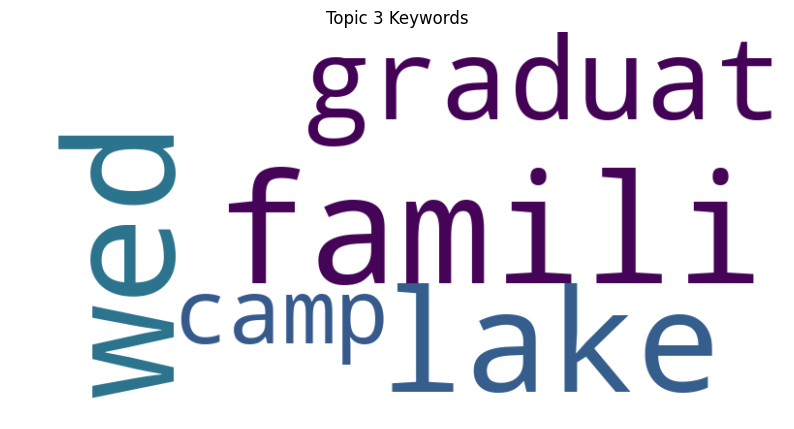

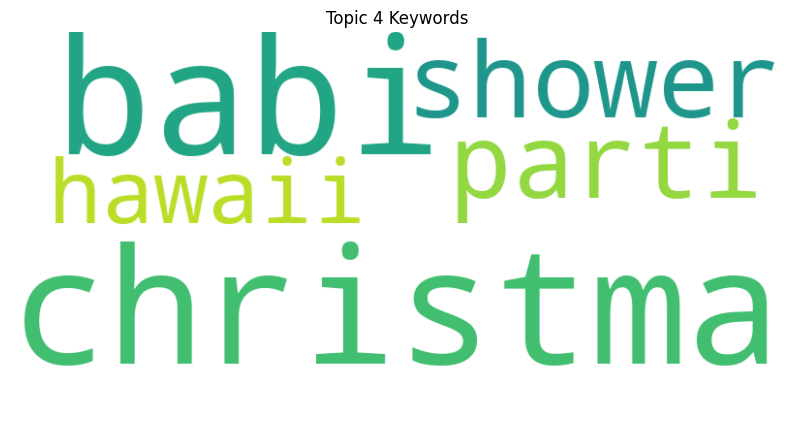

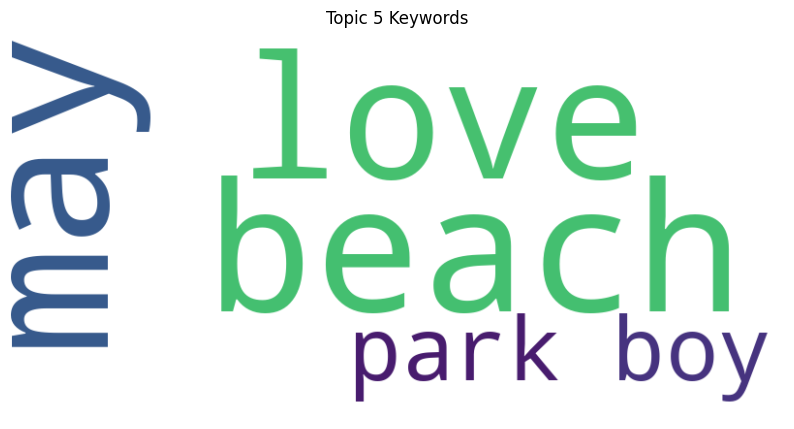

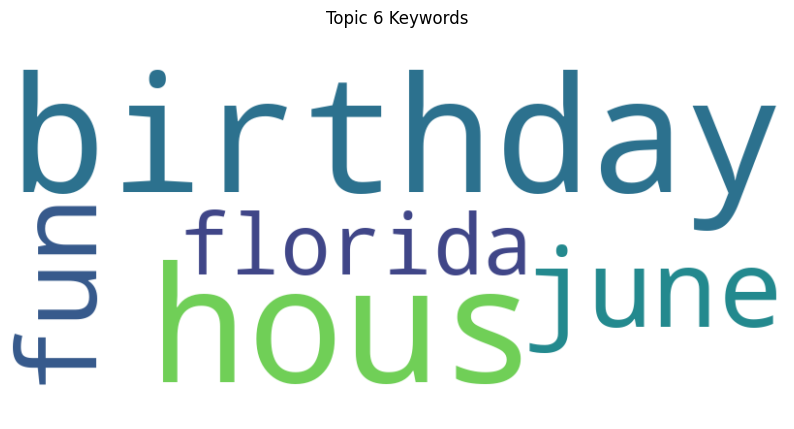

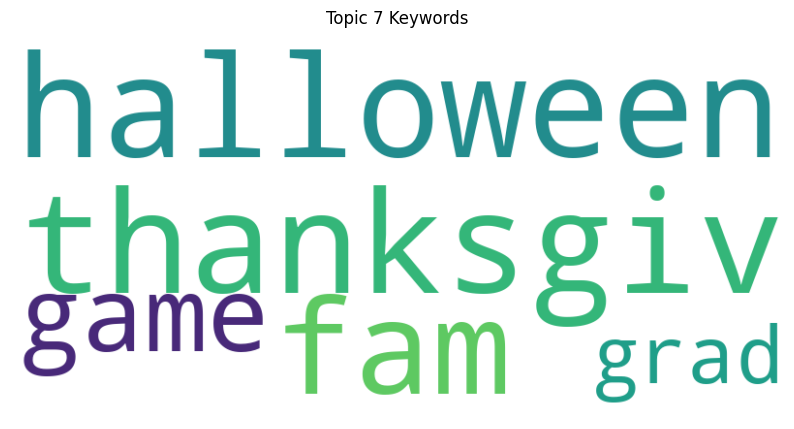

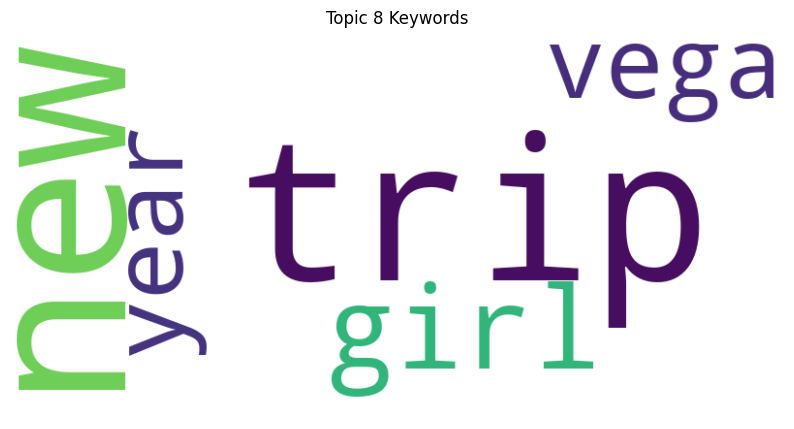

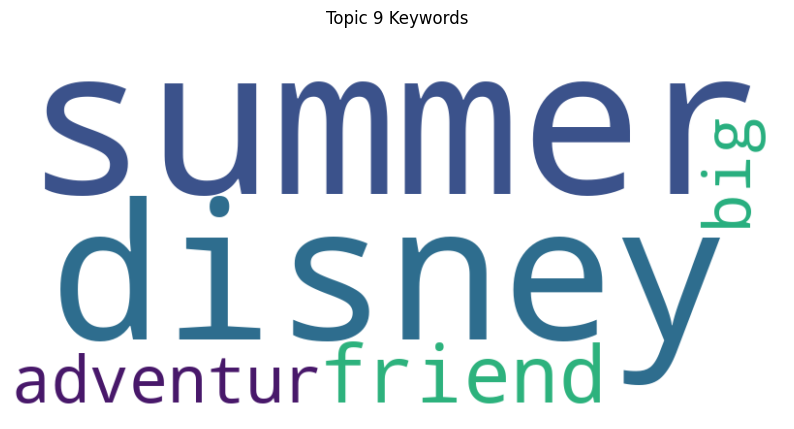

In [ ]:
for topic_idx, topic_keywords in enumerate(topic_keywords):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_keywords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Keywords')
    plt.axis('off')
    plt.show()

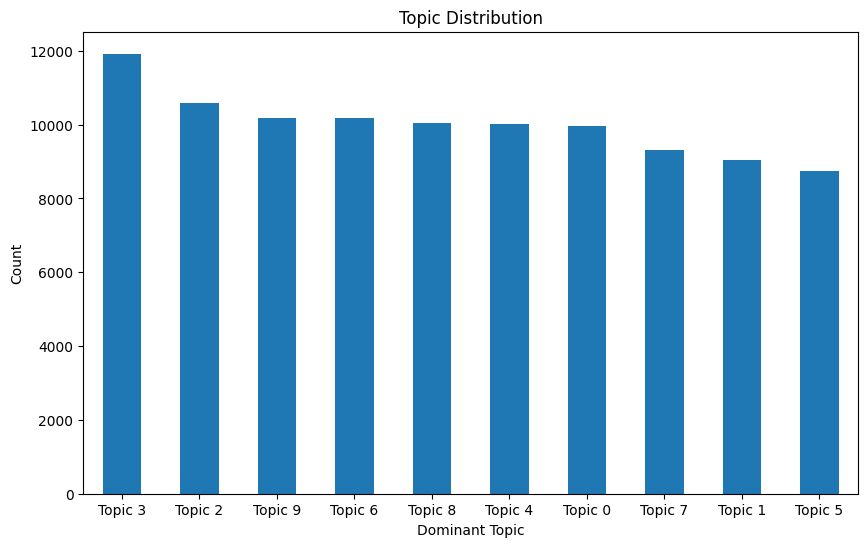

In [ ]:
plt.figure(figsize=(10, 6))
topic_counts['Dominant Topic'].value_counts().plot(kind='bar')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Topic Distribution')
plt.xticks(rotation=0)
plt.show()

#**n gram co-occurrence frequency**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import bigrams
from collections import Counter

In [ ]:
sampled_data['title'] = sampled_data['title'].apply(lambda words: ' '.join(words))

In [ ]:
sampled_data

,circle_uuid,title
143012,00005ce3-0940-f8d1-c107-3ea111840002,day tour
1147668,00005df2-efe8-f8d1-c16f-0952c9aa0002,hannah surgeri
155908,badb52d6-639f-4e10-83ac-a1e68df77e63,irt tropic care
4159738,c7a96b1c-6ed9-4f7f-9f51-d10a8280ee26,trabajo depa lane park
336965,7294fa2c-5957-4e4c-8974-a60061daa56d,random work shit
...,...,...
6101623,5831964e-7417-45db-832d-a6c169b28979,marc wilder
42187,00005d21-1f78-f8d1-c137-62e25a600002,random photo
426825,25977c72-5c93-4304-aff0-36fa17fb01b7,nutcrack
1568636,bbfa8dd4-8a0a-4f54-a345-51eba57aec71,yelagiri


In [ ]:
tokenized_titles = sampled_data['title'].str.split()

title_bigrams = list(bigrams([word for title in tokenized_titles for word in title]))

bigram_counts = Counter(title_bigrams)

most_common_bigrams = bigram_counts.most_common(10)

bigrams, frequencies = zip(*most_common_bigrams)

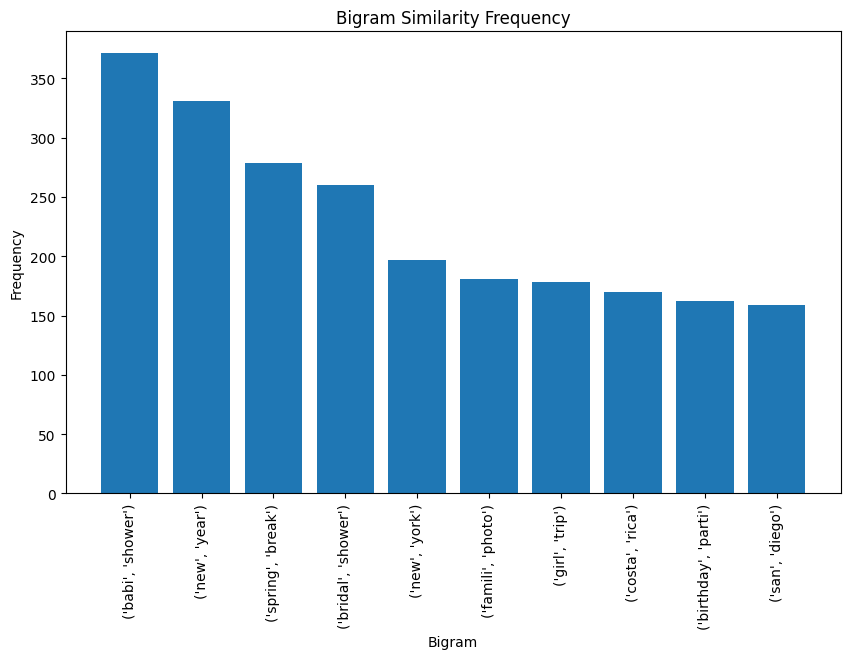

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), frequencies)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Similarity Frequency')
plt.xticks(range(len(bigrams)), bigrams, rotation=90)
plt.show()

#**Bigram with full dataset**

In [ ]:
data_pp['title'] = data_pp['title'].apply(lambda words: ' '.join(words))

tokenized_titles = [title.split() for title in data_pp['title'] if isinstance(title, str)]

bigram_list = list(bigrams([word for title in tokenized_titles for word in title]))

bigram_counts = Counter(bigram_list)

most_common_bigrams = bigram_counts.most_common(10)

bigrams, frequencies = zip(*most_common_bigrams)

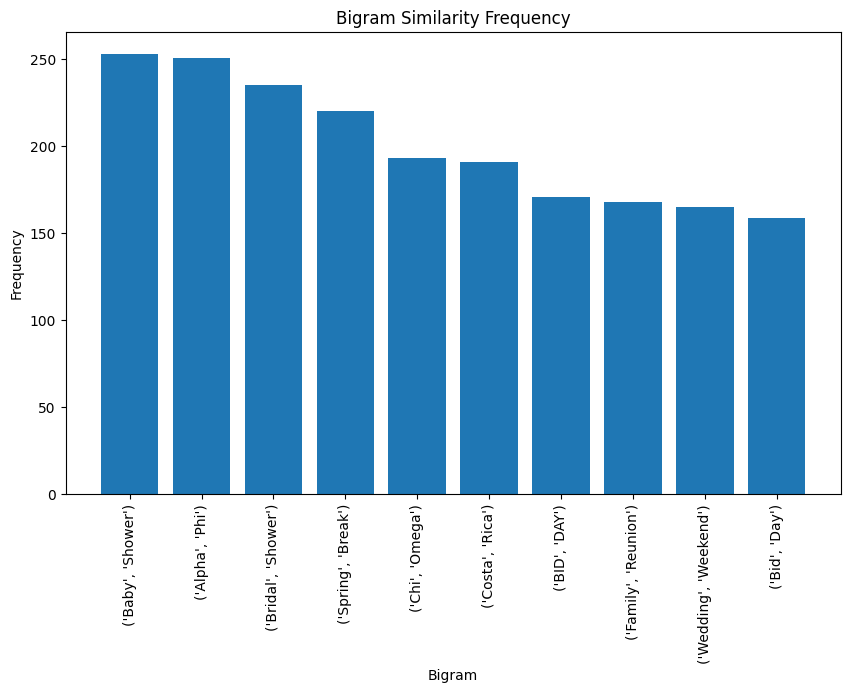

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), frequencies)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Similarity Frequency')
plt.xticks(range(len(bigrams)), bigrams, rotation=90)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df = pd.DataFrame({'Bigram': bigrams, 'Frequency': frequencies})

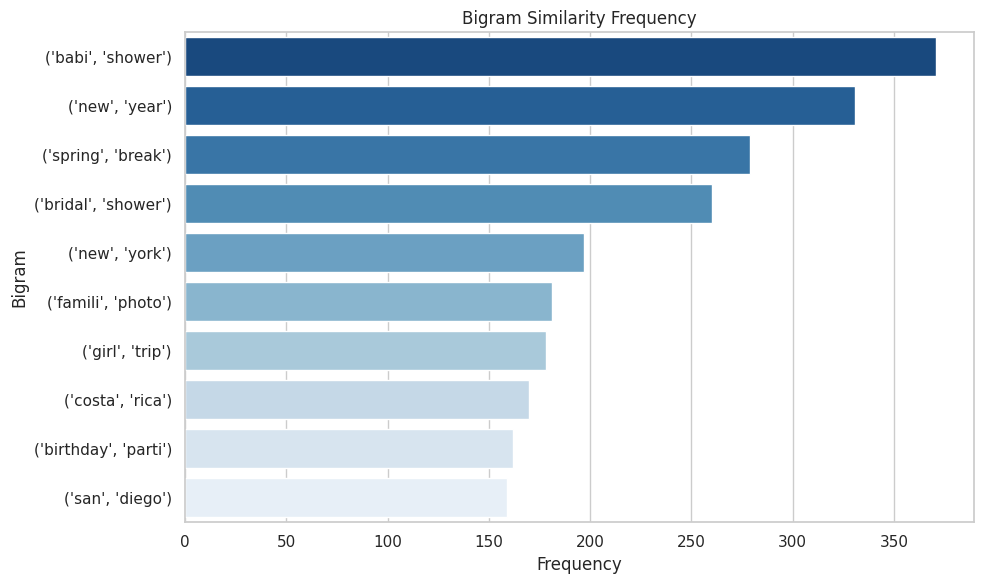

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df, palette='Blues_r')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Bigram Similarity Frequency')
plt.tight_layout()
plt.show()